# Model Definition

## Regression Model to Predict Customer Purchasing Behavior.

Now we will create a regression model that predicts the average monthly spend of new customers. For now, we will keep the same feaure variables, and just change the target variable.

We will use: 

- A Regression Linear Model from sklearn
- A Neural Network from keras

## Selection of Model Performance Indicator

For this regression task, we will use the **Mean Squared Error** as model performance indicator. We will use it because it tells how close a regression line is to a set of points. Besides, the MSE gives more weight to larger differences (due to the squared part). Since we want to penalize large differences, the MSE looks appropriate.

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
# Genererate the target variable y_
y2 = aw_avupdated['AveMonthSpend']
# Keep the same feature variable X

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(Features, y2, train_size=0.75, test_size=0.25, random_state=0)
scaler2 = preprocessing.StandardScaler().fit(X_train2[:, 15:])
X_train2[:, 15:] = scaler2.transform(X_train2[:, 15:])
X_valid2[:, 15:] = scaler2.transform(X_valid2[:, 15:])

### Machine Learning Model from sklearn (Linear Model)

In [44]:
# Define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [45]:
y_hat = lin_mod.predict(X_valid2)

# Model Evaluation

In [46]:
# Evaluate the model (get the MSE)

print("MSE of the Linear Regression Model: {}".format(mean_squared_error(y_hat, y_valid2)))

MSE of the Linear Regression Model: 38.72407571765726


### Deep Learning Model from Keras

In [47]:
import keras

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [60]:
# define the model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=X_train2.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train2, y_train2, epochs=10, batch_size = 32)

Epoch 1/10
12303/12303 [==============================] - 1s 55us/step - loss: 1759.7316
Epoch 2/10
12303/12303 [==============================] - 0s 35us/step - loss: 47.9815
Epoch 3/10
12303/12303 [==============================] - 0s 33us/step - loss: 33.5314
Epoch 4/10
12303/12303 [==============================] - 0s 31us/step - loss: 27.2264
Epoch 5/10
12303/12303 [==============================] - 0s 32us/step - loss: 22.1564
Epoch 6/10
12303/12303 [==============================] - 0s 32us/step - loss: 18.6525
Epoch 7/10
12303/12303 [==============================] - 0s 32us/step - loss: 16.8472
Epoch 8/10
12303/12303 [==============================] - 0s 34us/step - loss: 15.8097
Epoch 9/10
12303/12303 [==============================] - 0s 33us/step - loss: 15.2166
Epoch 10/10
12303/12303 [==============================] - 1s 48us/step - loss: 14.6733


## Evaluate the Neural Network Model

In [61]:
nn_pred = model.predict(X_valid2)
print("MSE of Neural Network Model: {}".format(mean_squared_error(nn_pred, y_valid2)))

MSE of Neural Network Model: 14.07499619750643


In [74]:
#print(history.history['loss'])

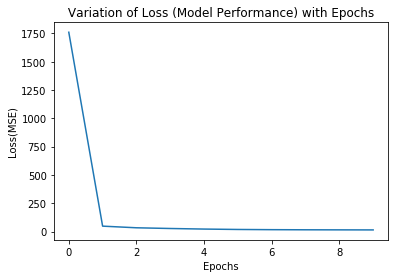

In [68]:
plt.plot(range(10), history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss(MSE)")
plt.title(" Variation of Loss (Model Performance) with Epochs ")
plt.show()

We have built two models. We built one classic Machine Learning model which was a Linear Regression (lin_mod) using scikit-learn, and one Deep Learning Model (model) using keras. 